### Tutorial 5: Data-preprocessing, binary classification, and model analysis

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#data frame
df = pd.read_csv('data/bank_customers.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Preprocessing
### removing irrelevant information

In [2]:
X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values
print(X[:5,:])
print(y[:5])

[[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 'Female' 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]]
[1 0 1 0 0]


### Feature Encoding

In [3]:
labelencoder_x_1 = LabelEncoder()

X[:, 1] = labelencoder_x_1.fit_transform(X[:, 1])
X[:, 2] = labelencoder_x_1.fit_transform(X[:, 2])

In [4]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
print(X[:10,:])
X = X[:, 1:]
print(X[:10,:])

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00
  4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00
  4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 5.0200000e+02 0.0000000e+00
  4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 6.9900000e+02 0.0000000e+00
  3.9000000e+01 1.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00
  0.0000000e+00 9.3826630e+04]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 8.5000000e+02 0.0000000e+00
  4.3000000e+01 2.0000000e+00 1.2551082e+05 1.0000000e+00 1.0000000e+00
  1.0000000e+00 7.9084100e+04]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.4500000e+02 1.0000000e+00
  4.4000000e+01 8.0000000e+00 1.1375578e+05 2.0000000

C:\Users\chase\Anaconda3\envs\CS4820\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\chase\Anaconda3\envs\CS4820\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.57873591, -0.57380915, -0.32622142, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.57873591,  1.74273971, -0.44003595, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.57873591, -0.57380915, -1.53679418, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-0.57873591, -0.57380915,  0.60498839, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.72790383, -0.57380915,  1.25683526, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.57873591, -0.57380915,  1.46377078, ...,  0.64609167,
        -1.03067011, -1.07636976]])

### Splitting dataset into training and testing sets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y )
print(X_train.shape)
print(y_train.shape)

(8000, 11)
(8000,)


## Binary-Classification model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(32, input_shape=(11,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, verbose=2, batch_size=10)

Epoch 1/50
8000/8000 - 1s - loss: 0.4513 - accuracy: 0.8018
Epoch 2/50
8000/8000 - 1s - loss: 0.3969 - accuracy: 0.8305
Epoch 3/50
8000/8000 - 1s - loss: 0.3662 - accuracy: 0.8497
Epoch 4/50
8000/8000 - 1s - loss: 0.3505 - accuracy: 0.8580
Epoch 5/50
8000/8000 - 1s - loss: 0.3437 - accuracy: 0.8619
Epoch 6/50
8000/8000 - 1s - loss: 0.3410 - accuracy: 0.8594
Epoch 7/50
8000/8000 - 1s - loss: 0.3378 - accuracy: 0.8630
Epoch 8/50
8000/8000 - 1s - loss: 0.3360 - accuracy: 0.8631
Epoch 9/50
8000/8000 - 1s - loss: 0.3344 - accuracy: 0.8629
Epoch 10/50
8000/8000 - 2s - loss: 0.3329 - accuracy: 0.8624
Epoch 11/50
8000/8000 - 2s - loss: 0.3315 - accuracy: 0.8626
Epoch 12/50
8000/8000 - 2s - loss: 0.3301 - accuracy: 0.8646
Epoch 13/50
8000/8000 - 1s - loss: 0.3286 - accuracy: 0.8665
Epoch 14/50
8000/8000 - 2s - loss: 0.3272 - accuracy: 0.8668
Epoch 15/50
8000/8000 - 2s - loss: 0.3247 - accuracy: 0.8640
Epoch 16/50
8000/8000 - 1s - loss: 0.3243 - accuracy: 0.8660
Epoch 17/50
8000/8000 - 1s - loss

## Analysis

In [10]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test) 
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.71      0.45      0.55       407

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm)

,0,1
0,1520,73
1,202,205


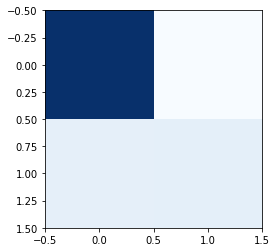

In [43]:
plt.imshow(cm, cmap='Blues')
